In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import joblib

In [2]:
crop = pd.read_csv("https://raw.githubusercontent.com/suresh-dc/AIDI-2004-Final/main/Crop_recommendation.csv")

crop.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [4]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
#no.of records in the dataset
crop.size

17600

In [6]:
#Size of the dataset
crop.shape

(2200, 8)

In [7]:
#columns of the dataset
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
#type of data in the columns
crop.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [9]:
#checking for null values
crop.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

no null values present


In [10]:
crop.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [11]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [12]:
# no.of crops present in the 'label' column

crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

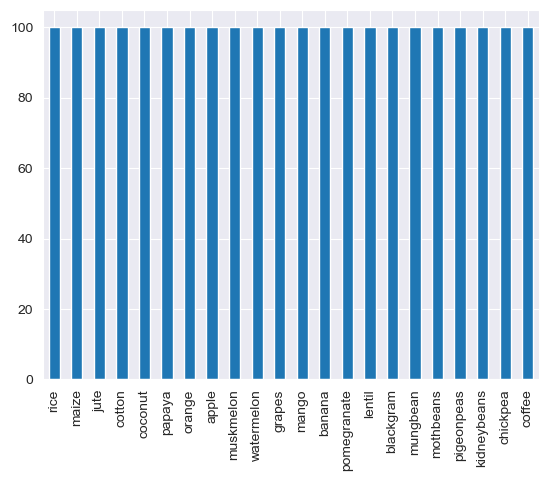

In [13]:
#visual representation of unique label counts
labels = crop["label"].unique()
crop["label"].value_counts().plot(kind="bar")
plt.show()

In [14]:
# Summary for all the crops

print("Average PH Value of the soil : {0:.2f}".format(crop['ph'].mean()))
print("Average Relative Humidity in % : {0:.2f}".format(crop['humidity'].mean()))
print("Average Ratio of Potassium in the Soil : {0:.2f}".format(crop['K'].mean()))
print("Average Ratio of Nitrogen in the Soil : {0:.2f}".format(crop['N'].mean()))
print("Average Ratio of Phosphorous in the Soil : {0:.2f}".format(crop['P'].mean()))
print("Average Tempature in Celsius : {0:.2f}".format(crop['temperature'].mean()))
print("Average Rainfall in mm : {0:.2f}".format(crop['rainfall'].mean()))



Average PH Value of the soil : 6.47
Average Relative Humidity in % : 71.48
Average Ratio of Potassium in the Soil : 48.15
Average Ratio of Nitrogen in the Soil : 50.55
Average Ratio of Phosphorous in the Soil : 53.36
Average Tempature in Celsius : 25.62
Average Rainfall in mm : 103.46


Above shows that :

PH is close to 6.5, 
Temperature should be around 25°C,
Rain fall is around 100mm,
Relative Humidity is 70%,
At last nitrogen,Phosphorous and potassium levels are approx 50%


C:\Users\chara\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chara\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chara\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

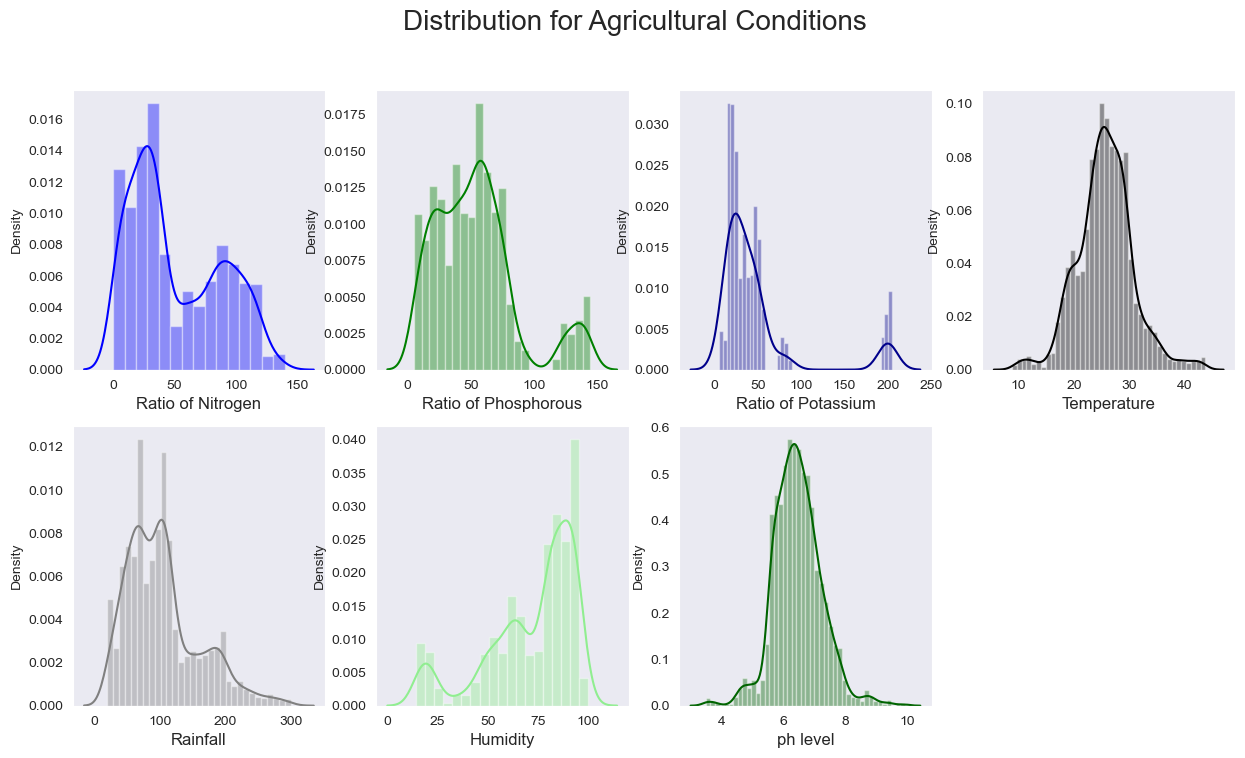

In [15]:
#Distribution for Agricultural Conditions

plt.figure(figsize=(15,8))
plt.subplot(2,4,1)
sns.distplot(crop['N'],color = 'blue')
plt.xlabel('Ratio of Nitrogen',fontsize = 12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(crop['P'],color = 'green')
plt.xlabel('Ratio of Phosphorous',fontsize = 12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(crop['K'],color = 'darkblue')
plt.xlabel('Ratio of Potassium',fontsize = 12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(crop['temperature'],color = 'black')
plt.xlabel('Temperature',fontsize = 12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(crop['rainfall'],color = 'grey')
plt.xlabel('Rainfall',fontsize = 12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(crop['humidity'],color = 'lightgreen')
plt.xlabel('Humidity',fontsize = 12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(crop['ph'],color = 'darkgreen')
plt.xlabel('ph level',fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()

Analyzing Agricultural Conditions

> Above Graph shows most of the crops need Nitrogen, Phosphorous and Potassium at a very high level.

> Need  of  rain, temperature, humidity and ph value vary from crop to crop.





<Figure size 1500x1300 with 0 Axes>

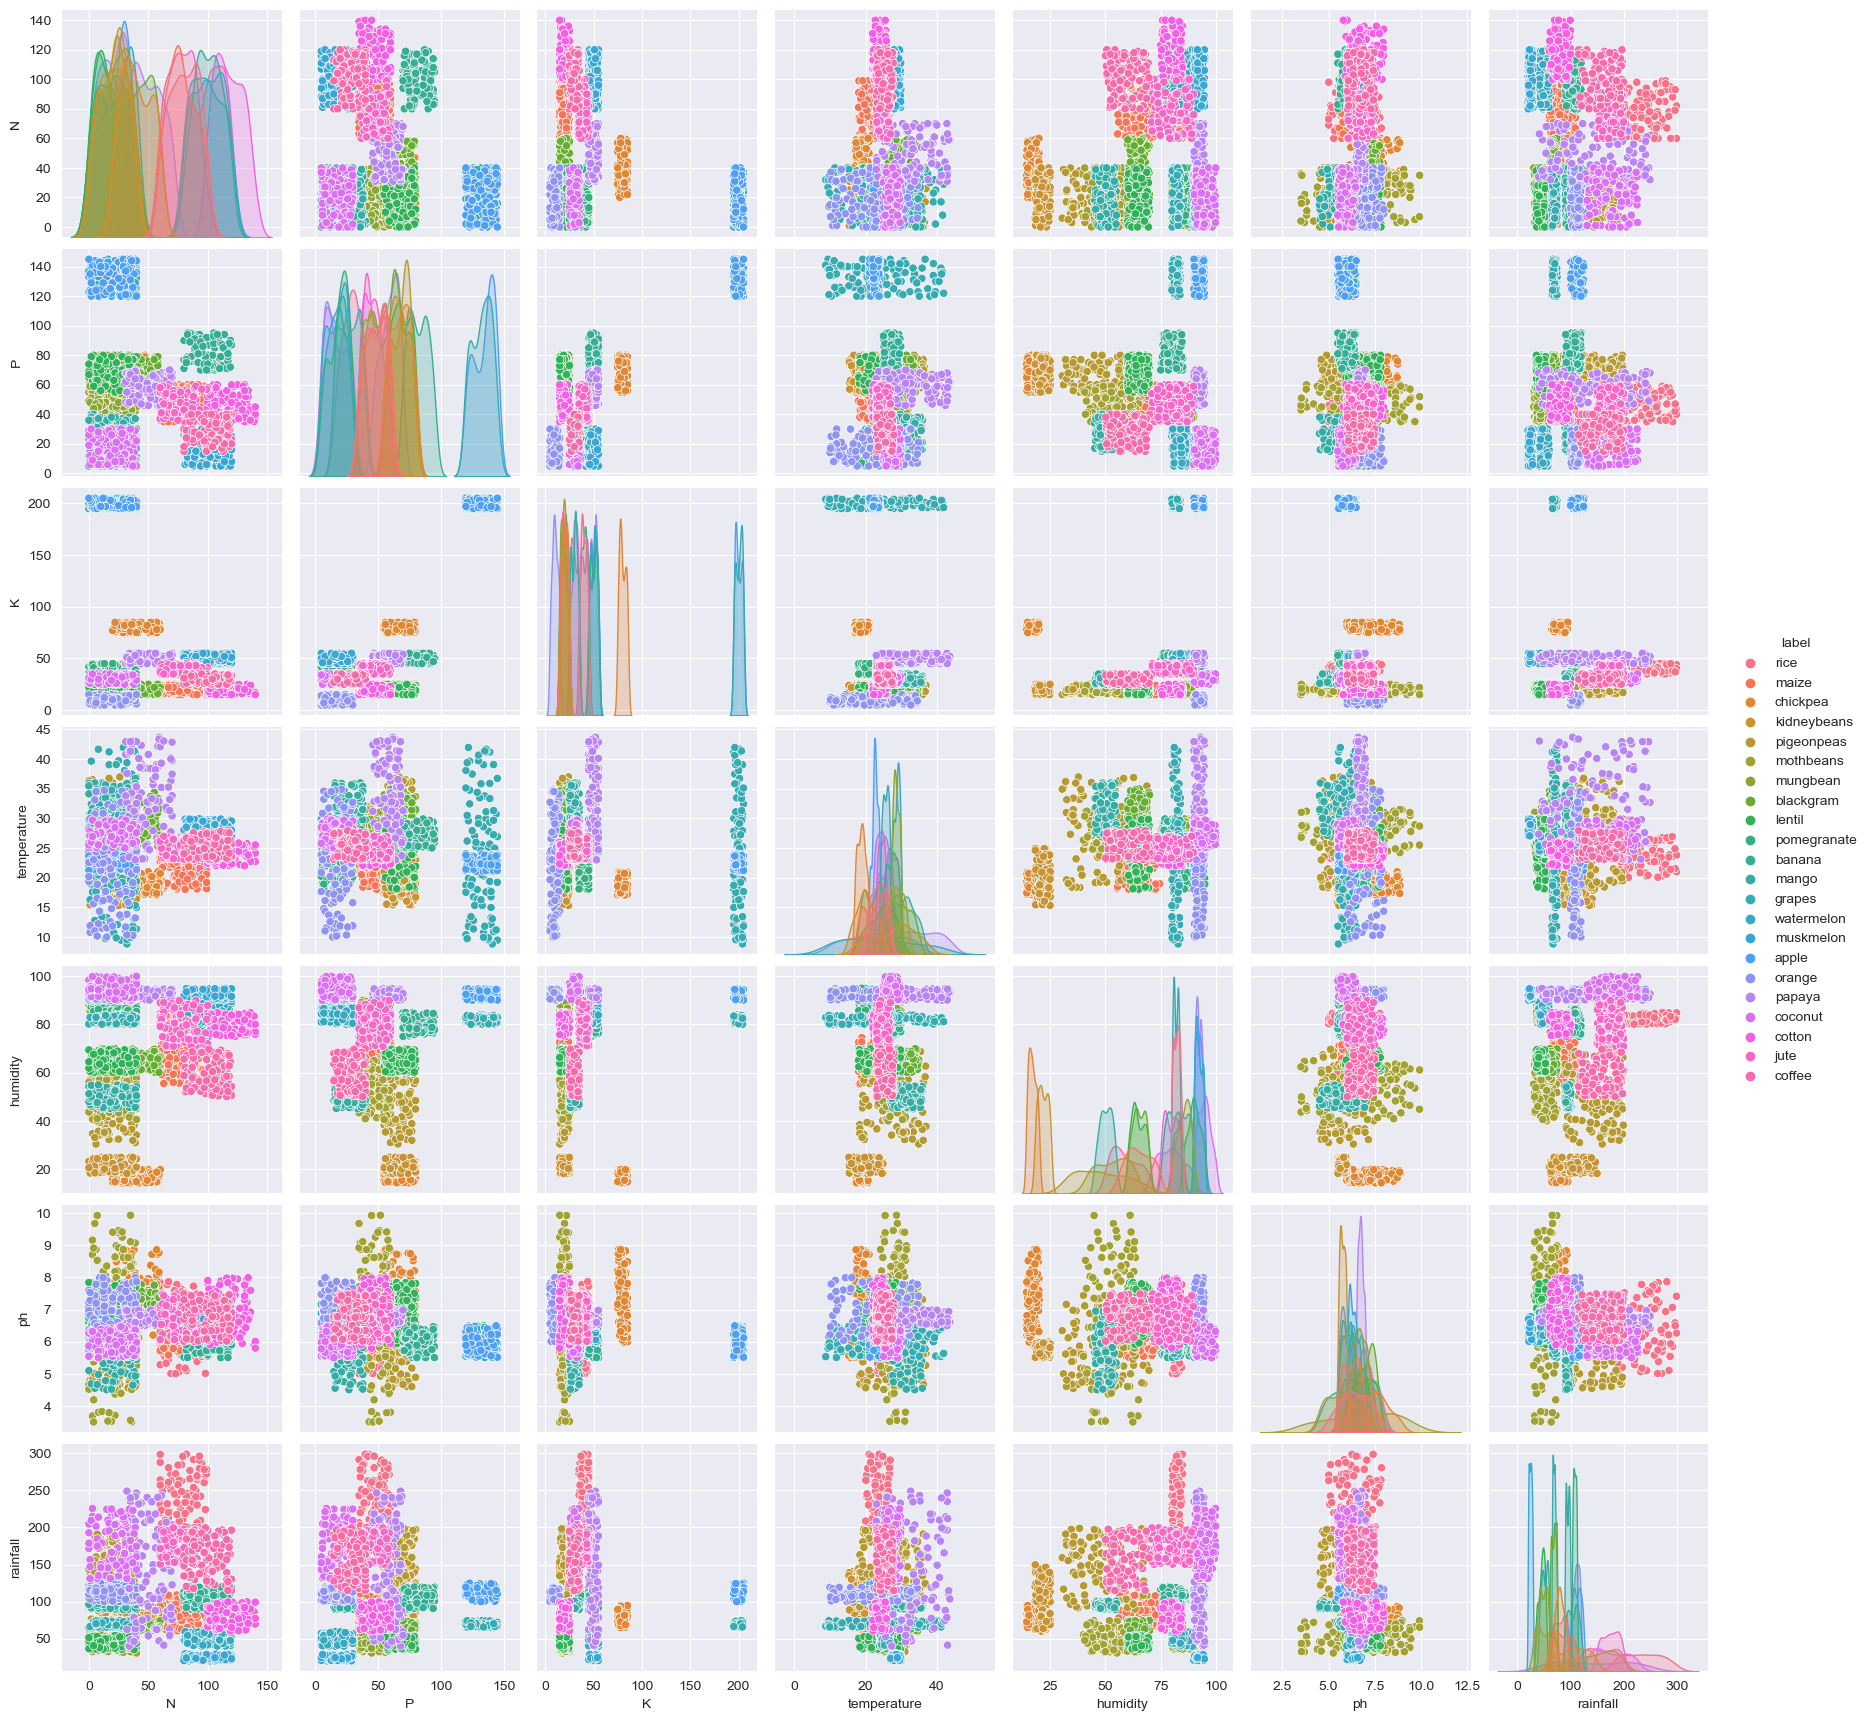

In [16]:
plt.figure(figsize=(15,13))
sns.pairplot(crop, hue = "label")
plt.show()

paiplot shows that distinct groups are created based on the specific characteristics or features present in the dataset.

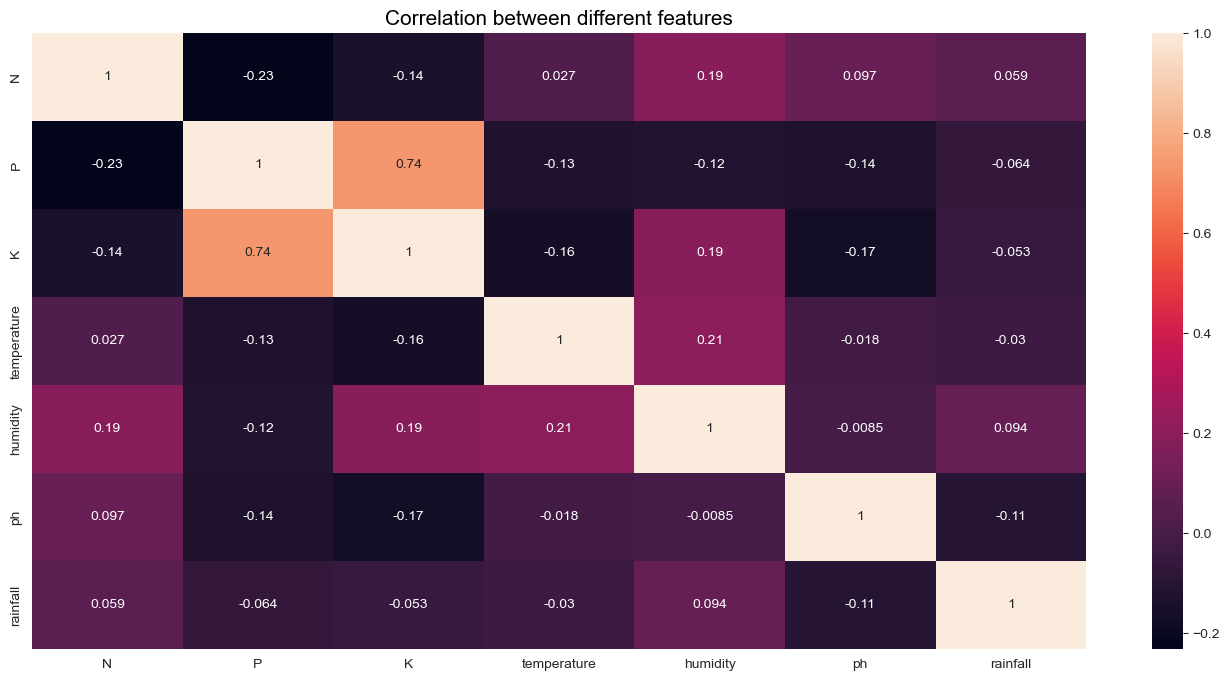

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(17, 8))
sns.heatmap(crop.corr(), annot=True )
plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

C:\Users\chara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chara\anaconda3\lib\si

Text(0.5, 0, 'Rainfall')

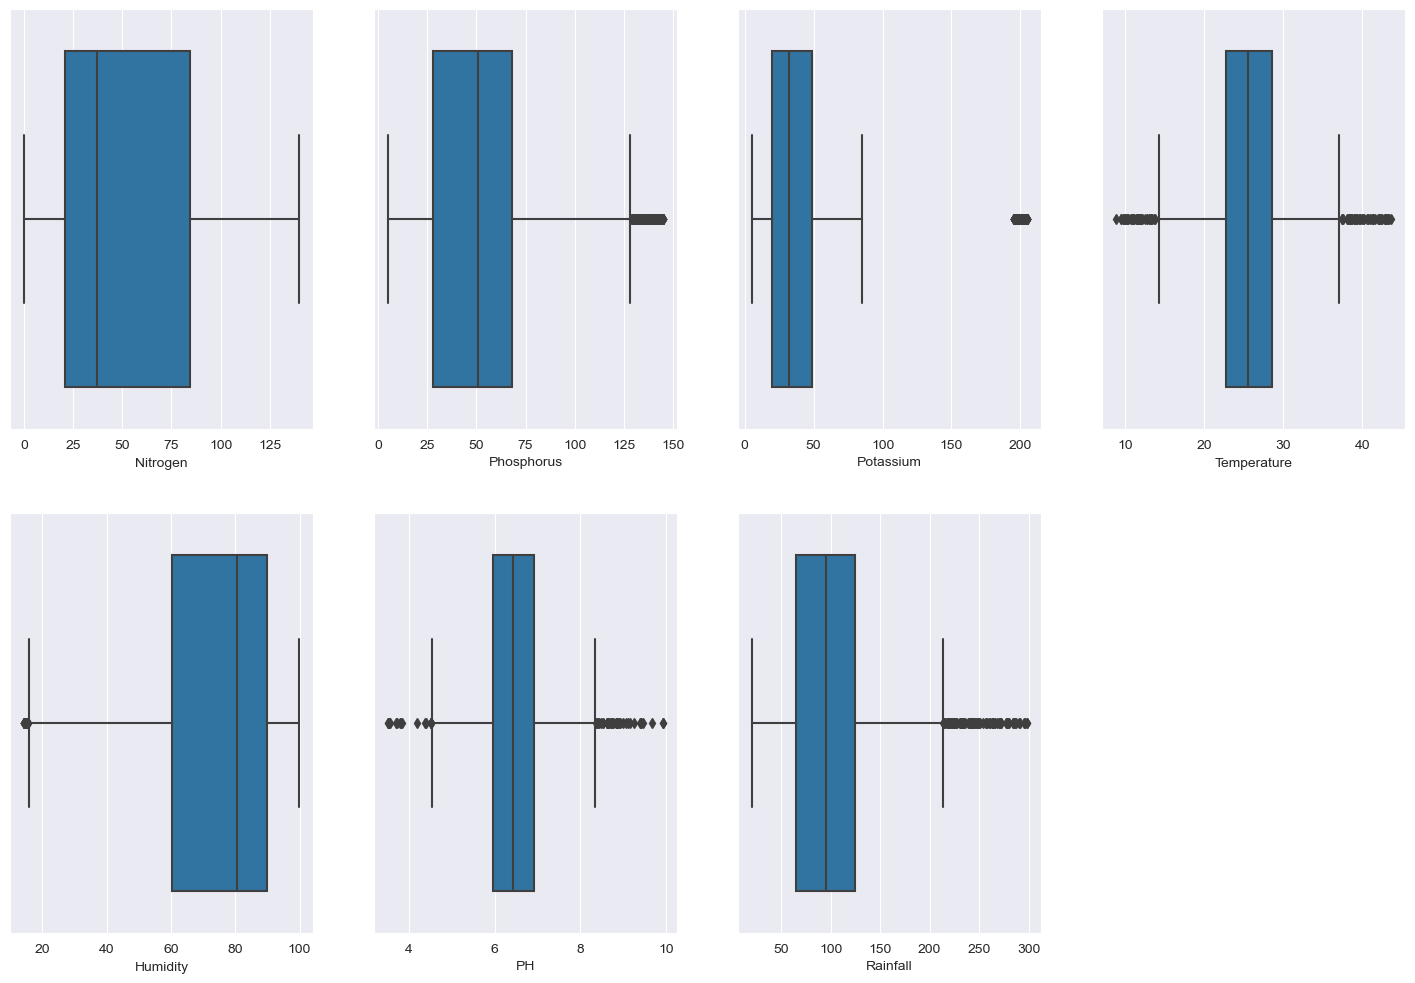

In [18]:
from logging import critical
fig_dims = (18, 12)
fig, ax = plt.subplots(figsize=fig_dims)

plt.subplot(2,4,1)
sns.boxplot(crop['N'])
plt.xlabel('Nitrogen')

plt.subplot(2,4,2)
sns.boxplot(crop['P'])
plt.xlabel('Phosphorus')

plt.subplot(2,4,3)
sns.boxplot(crop['K'])
plt.xlabel('Potassium')

plt.subplot(2,4,4)
sns.boxplot(crop['temperature'])
plt.xlabel('Temperature')

plt.subplot(2,4,5)
sns.boxplot(crop['humidity'])
plt.xlabel('Humidity')

plt.subplot(2,4,6)
sns.boxplot(crop['ph'])
plt.xlabel('PH')

plt.subplot(2,4,7)
sns.boxplot(crop['rainfall'])
plt.xlabel('Rainfall')

In [21]:
x = crop.drop(['label'], axis = 1)
y = crop['label']

print("The Shape of x:", x.shape)
print("The Shape of y:", y.shape)

The Shape of x: (2200, 7)
The Shape of y: (2200,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,shuffle = True, random_state = 0)


In [23]:
# build the KNN model
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [24]:
# predict the results
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
y_pred=kn_classifier.predict(X_test)
print(y_pred)

['watermelon' 'watermelon' 'grapes' 'chickpea' 'blackgram' 'jute'
 'mothbeans' 'kidneybeans' 'muskmelon' 'banana' 'mothbeans' 'coffee'
 'lentil' 'mungbean' 'mango' 'apple' 'coffee' 'lentil' 'coffee' 'mango'
 'coconut' 'blackgram' 'kidneybeans' 'jute' 'cotton' 'coffee' 'lentil'
 'orange' 'mothbeans' 'kidneybeans' 'pomegranate' 'rice' 'maize'
 'muskmelon' 'coconut' 'cotton' 'mango' 'mango' 'watermelon' 'mothbeans'
 'maize' 'blackgram' 'pigeonpeas' 'watermelon' 'pigeonpeas' 'mungbean'
 'kidneybeans' 'kidneybeans' 'cotton' 'mungbean' 'mothbeans' 'blackgram'
 'apple' 'muskmelon' 'pigeonpeas' 'banana' 'papaya' 'mango' 'lentil'
 'cotton' 'orange' 'mungbean' 'watermelon' 'rice' 'muskmelon' 'apple'
 'grapes' 'coffee' 'apple' 'orange' 'coconut' 'pomegranate' 'kidneybeans'
 'maize' 'grapes' 'mothbeans' 'chickpea' 'maize' 'jute' 'mango' 'rice'
 'blackgram' 'watermelon' 'watermelon' 'muskmelon' 'cotton' 'maize'
 'lentil' 'mothbeans' 'papaya' 'blackgram' 'jute' 'mungbean' 'grapes'
 'mungbean' 'maize

In [25]:
joblib.dump(kn_classifier, "model.joblib")

['model.joblib']

In [26]:
pred_kn = kn_classifier.predict(X_test)

In [28]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = kn_classifier.predict(data)
print(prediction)

['coffee']


C:\Users\chara\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [32]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred_kn)*100
print('Accuracy of the Model : ', round(accuracy, 3), '%')

Accuracy of the Model :  97.727 %


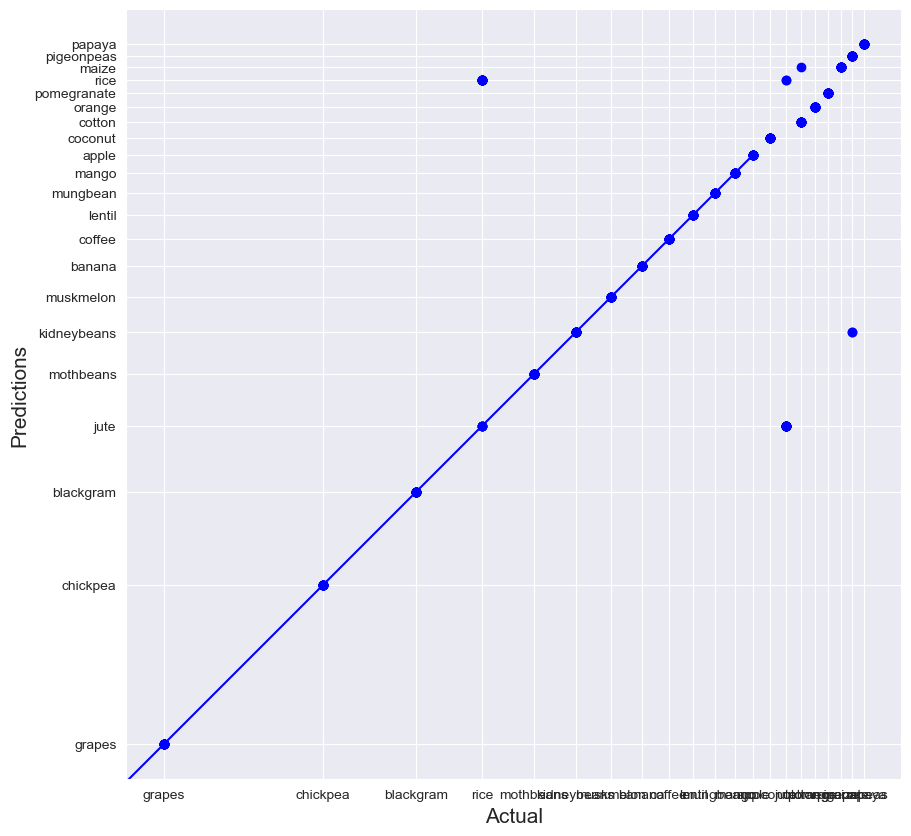

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='blue')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()